# **Mimesis Data Generator**

Mimesis is a robust data generator for Python that can produce a wide range of synthetic data in various languages. This tool is useful for populating testing databases, creating fake API endpoints, filling pandas DataFrames, generating JSON and XML files with custom structures, and anonymizing production data, among other purposes.

The purpose of this notebook is to attempt to create a sythetic AML dataset. The Anti Money Laundering Transaction Data (SAML-D) will be used as a reference source to attempt to replicate a similar output.

https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml?resource=download

### **Source Data Access**

First, the source dataset is accessed from Google Drive. Alternatively, save the file and access via the commented out code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/My Drive')

['How to get started with Drive.pdf', 'Master Data Science', 'Colab Notebooks']

In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Master Data Science/(8) Team Project (A) - Project Management and Practices/Synthetic Data/Mimesis/SAML-D.csv'

AML_Data = pd.read_csv(file_path)

#AML_Data = pd.read_csv('/content/SAML-D.csv')

AML_Data.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


### **Source Data EDA (Exploratory Data Analysis)**

Descriptive statistics play a crucial role in understanding the characteristics of a dataset. By analysing the distribution of each column, we gain insights into the central tendency, variability, and shape of the data. Let's delve into the details:

1. Central Tendency:
* The mean (average) provides a measure of the central value of a column. It
represents the typical value around which the data points cluster.

* The median (middle value) is another central measure. It divides the data into two equal halves, making it less sensitive to extreme values.

* The mode (most frequent value) indicates the most common data point.

2. Variability:

* The range (difference between the maximum and minimum values) gives an idea of the spread of the data.

* The variance and standard deviation quantify the dispersion around the mean. Larger values indicate greater variability.

3. Shape of the Distribution:

* A histogram visually displays the frequency distribution of a continuous variable. It helps identify patterns such as symmetry, skewness, or multimodality.

* Skewness measures the asymmetry of the distribution. A positive skew indicates a longer tail on the right, while a negative skew has a longer left tail.

**Source Data information**:

The SAML dataset has 12 columns with 9504852 samples. We observe three data types integer, object, and float.

In [ ]:
print("Type  of data: ", type(AML_Data))
print("Shape of data: ", AML_Data.shape)
print("----------------------------------------------")
print("----------------------------------------------")
print("Data information:", AML_Data.info())

Type  of data:  <class 'pandas.core.frame.DataFrame'>
Shape of data:  (9504852, 12)
----------------------------------------------
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
Data information: None


**Missing data:**

There seems to be no missing values in the SAML dataset.

In [ ]:
# Count the number of missing values for each column

print("Is there missing values in the dataset")
print("--------------------------------------")
print("--------------------------------------")
AML_Data.isnull().sum()

Is there missing values in the dataset
--------------------------------------
--------------------------------------


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

**Description of the dataset**

The dataset provides descriptive statistics on financial transactions, encompassing sender and receiver account numbers, transaction amounts, and indicators for potential money laundering. With over 9.5 million entries, the mean sender and receiver account numbers indicate a significant diversity in transaction origins and destinations. The standard deviations imply notable variability around the mean, highlighting the range of account values involved. Transaction amounts exhibit a wide distribution, with a mean of approximately 8,763 dollars and a standard deviation of around 25,615 dollars, suggesting a varied financial landscape within the dataset. The presence of a binary indicator for potential money laundering shows that only a very small fraction, about 0.1%, of transactions are flagged, though this still represents a non-negligible concern. Overall, the dataset portrays a complex financial network with diverse transaction sizes and minimal instances of flagged suspicious activity.


The dataset provides additional insights into the characteristics of financial transactions, including payment and received currencies, sender and receiver bank locations, payment types, and laundering types. With nearly 9.5 million entries, it offers a comprehensive view of financial activity. The dominance of UK pounds as both the payment and received currency, indicated by over 90% of transactions, suggests a concentrated geographical focus on UK-based transactions. Similarly, the majority of transactions involve banks located in the UK for both senders and receivers, underscoring the domestic nature of the financial network. Payment types primarily revolve around credit card transactions, indicating a reliance on electronic payment methods within the dataset. Additionally, the presence of various laundering types, with "Normal_Small_Fan_Out" being the most common, hints at potential illicit activities within the financial system. Overall, these insights shed light on the intricacies of financial transactions within the dataset, highlighting the prevalence of UK pounds, electronic payment methods, and potential laundering activities.

**Transactions by month**

The bar chart shows the number of transactions by month from the source dataset. The number of transactions is relatively uniform except for the first and last month which are lower than the other months.

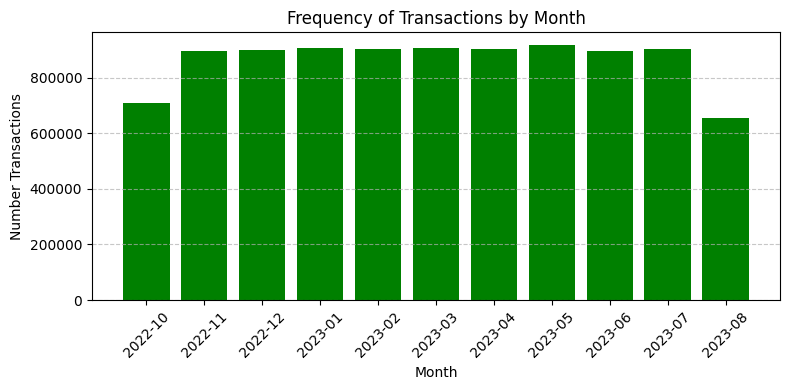

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
AML_Data['Date'] = pd.to_datetime(AML_Data['Date'])

# Extract month from date
AML_Data['Month'] = AML_Data['Date'].dt.to_period('M')

# Count occurrences of each month
transaction_count_by_month_year = AML_Data.groupby('Month').size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(8, 4))
plt.bar(transaction_count_by_month_year['Month'].astype(str), transaction_count_by_month_year['count'], color='green')
plt.title('Frequency of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Transactions amounts**

The describe function is used to show the amount statistics. The average amount is 8,762 with a large standard deviation of 25,614. The majority of transactions are under 10,000 (75%) with a maximum transaction value of 12,618,998.

In [ ]:
AML_Data[['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,9504852.0,8762.967601,25614.953,3.73,2143.6875,6113.72,10458.4625,12618498.4


**Currency and Bank Locations**

The majority (96%) of transactions were made in UK pounds and the majority of bank locations in the UK.

**Payment Types**

The number of payments by payment type shows that credit card, debit card, cheque and ACH were the most frequent transactions.

In [ ]:
payment_type_counts = AML_Data['Payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['Payment_type', 'Count']

payment_type_counts

,Payment_type,Count
0,Credit card,2012909
1,Debit card,2012103
2,Cheque,2011419
3,ACH,2008807
4,Cross-border,933931
5,Cash Withdrawal,300477
6,Cash Deposit,225206


**Laundering Flag**

The number of laundering transactions is 9873 which represents only 0.104% of total transactions. The large class imbalance presents and issue when modelling.

In [ ]:
is_laundering_counts = AML_Data['Is_laundering'].value_counts().reset_index()
is_laundering_counts.columns = ['Is_laundering', 'Count']

is_laundering_counts

,Is_laundering,Count
0,0,9494979
1,1,9873


### **Data Generation**

The first step is to install the mimesis library.

In [ ]:
!pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.8 MB/s eta 0:00:00


The code below provides a list of attributes and methods in the object named 'Fake' from the generic provider.

In [ ]:
from mimesis import Generic
from mimesis.locales import Locale

fake = Generic(Locale.EN_AU)
print(dir(fake))

['address', 'binaryfile', 'choice', 'code', 'cryptographic', 'datetime', 'development', 'file', 'finance', 'food', 'hardware', 'internet', 'numeric', 'path', 'payment', 'person', 'science', 'text', 'transport']


In [ ]:
from mimesis import Generic
from mimesis.locales import Locale

fake = Generic(Locale.EN_AU)
print(dir(fake))

['address', 'binaryfile', 'choice', 'code', 'cryptographic', 'datetime', 'development', 'file', 'finance', 'food', 'hardware', 'internet', 'numeric', 'path', 'payment', 'person', 'science', 'text', 'transport']


The code below shows the methods within the finance method.

In [ ]:
finance_methods = dir(fake.finance)
print(finance_methods)

['Meta', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dataset', '_extract', '_has_seed', '_load_dataset', '_override_locale', '_read_global_file', '_setup_locale', '_update_dict', 'bank', 'company', 'company_type', 'cryptocurrency_iso_code', 'cryptocurrency_symbol', 'currency_iso_code', 'currency_symbol', 'get_current_locale', 'locale', 'override_locale', 'price', 'price_in_btc', 'random', 'reseed', 'seed', 'stock_exchange', 'stock_name', 'stock_ticker', 'update_dataset', 'validate_enum']


A dataframe is created by calling different providers and the methods and a for loop is used to iterate over 1000 samples. The attributes from the source dataset are replicated.

In [ ]:
import pandas as pd
import numpy as np


AML_Data_Gen = pd.DataFrame(
   [
       {
           "Time": fake.datetime.formatted_time(),
           "Date": fake.datetime.formatted_date(start=2023, end=2023),
           "Sender_account": np.random.randint(1, 10000000000),
           "Receiver_account": np.random.randint(1, 10000000000),
           "Amount": fake.finance.price(),
           "Payment_currency": fake.finance.currency_iso_code(),
           "Received_currency": fake.finance.currency_iso_code(),
           "Sender_bank_location": fake.address.country_code(),
           "Receiver_bank_location": fake.address.country_code(),
           "Payment_type": fake.choice(['Credit card', 'Debit card', 'Cheque', 'ACH', 'Cross-border', 'Cash Withdrawal', 'Cash Deposit']),
           "Is_laundering": np.random.choice([0, 1], p=[0.99, 0.01]),
           "Laundering_type": fake.choice(['Normal_Small_Fan_Out', 'Normal_Fan_Out', 'Normal_Fan_In', 'Normal_Group', 'Normal_Cash_Withdrawal', 'Normal_Cash_Deposits',
                                           'Normal_Periodical', 'Normal_Plus_Mutual', 'Normal_Mutual', 'Normal_Foward', 'Normal_single_large', 'Structuring',
                                           'Cash_Withdrawal', 'Deposit-Send', 'Smurfing', 'Layered_Fan_In', 'Layered_Fan_Out', 'Stacked Bipartite', 'Behavioural_Change_1',
                                           'Bipartite', 'Cycle', 'Fan_In', 'Gather-Scatter', 'Behavioural_Change_2', 'Scatter-Gather', 'Single_large', 'Fan_Out', 'Over-Invoicing'])
       }
       for _ in range(1000)
   ]
)


AML_Data_Gen.head()


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,12:49:17,06/09/2023,2269826290,9256597252,1162.47,AUD,AUD,MG,RU,Cheque,0,Structuring
1,13:59:59,16/09/2023,5789822601,9337945081,1297.57,AUD,AUD,BD,BW,Debit card,0,Stacked Bipartite
2,03:49:08,06/01/2023,3110628878,6065670391,905.89,AUD,AUD,ZW,PE,Cash Withdrawal,0,Fan_In
3,14:41:13,13/08/2023,8449727437,9587191609,1493.90,AUD,AUD,MC,IM,Cash Deposit,0,Stacked Bipartite
4,22:45:08,29/11/2023,4529414061,3657585936,572.48,AUD,AUD,HK,MQ,Cheque,0,Bipartite


### **Generated Data EDA (Exploratory Data Analysis)**

EDA is necessary to validate the data generated to ensure robustness and to make sure the quality of the data is acceptable for further modelling.

**Transactions by month**

The plots below compares the source dataset with the generated dataset. The source dataset follows a uniform distribution whereas the generated dataset varies by month.

Text(0, 0.5, 'Number Transactions')

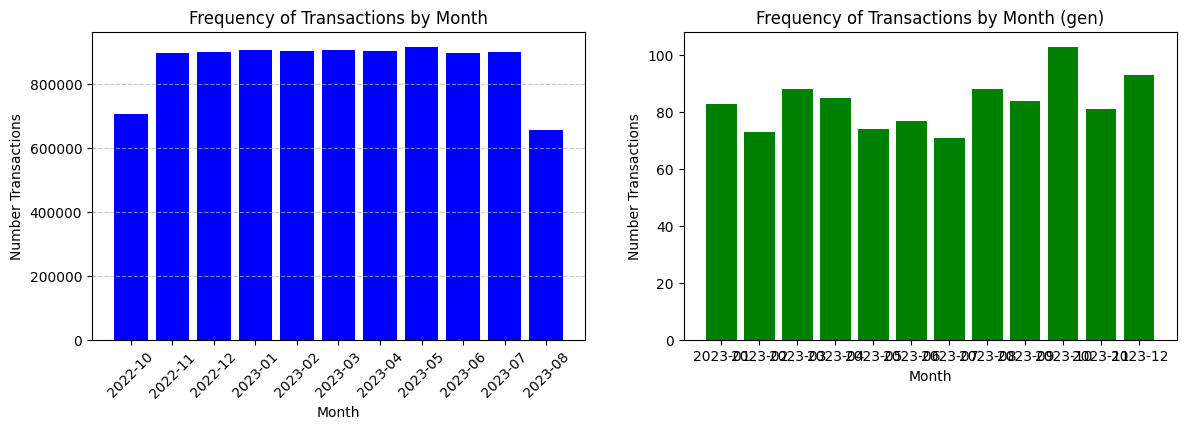

In [ ]:
# Convert 'Date' column to datetime with day/month/year format
AML_Data_Gen['Date'] = pd.to_datetime(AML_Data_Gen['Date'], format='%d/%m/%Y')

# Extract month from date
AML_Data_Gen['Month'] = AML_Data_Gen['Date'].dt.to_period('M')

# Count occurrences of each month
transaction_count_by_month_year_gen = AML_Data_Gen.groupby('Month').size().reset_index(name='count')
plt.figure(figsize=(14, 4))

# Plotting the first chart
plt.subplot(1, 2, 1)
plt.bar(transaction_count_by_month_year['Month'].astype(str), transaction_count_by_month_year['count'], color='blue')
plt.title('Frequency of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the second chart
plt.subplot(1, 2, 2)
plt.bar(transaction_count_by_month_year_gen['Month'].astype(str), transaction_count_by_month_year_gen['count'], color='green')
plt.title('Frequency of Transactions by Month (gen)')
plt.xlabel('Month')
plt.ylabel('Number Transactions')



**Transactions amounts**

Both the source and generated amounts are summarised. The mean value for the generated dataset is much lower than the source dataset and the spread of data (standard deviation) is much smaller.

In [ ]:
AML_Data[['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,9504852.0,8762.967601,25614.953,3.73,2143.6875,6113.72,10458.4625,12618498.4


In [ ]:
AML_Data_Gen[['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,1000.0,1000.78107,292.490525,501.16,746.1925,984.1,1261.6675,1499.54


**Currency and Bank Locations**

Due to the locale being set to Australia, all currency values are in AUD. However, the sender bank location and receiver bank location are all over the world. This inconsistency would create issues when generaliising the model to real world data.

In [ ]:
AML_Data_Gen['Payment_currency'].value_counts(normalize=True)

Payment_currency
AUD    1.0
Name: proportion, dtype: float64

In [ ]:
AML_Data_Gen['Sender_bank_location'].value_counts(normalize=True)

Sender_bank_location
AI    0.010
HR    0.010
BA    0.010
HK    0.009
CU    0.008
      ...  
NF    0.001
UY    0.001
AD    0.001
BE    0.001
KM    0.001
Name: proportion, Length: 241, dtype: float64

**Payment Types**

The frequency of payment types for the source dataset shows that over 80% of transactions come from credit card, debit card, cheque and ACH whereas there is a more even spread of transaction payment types in the generated dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

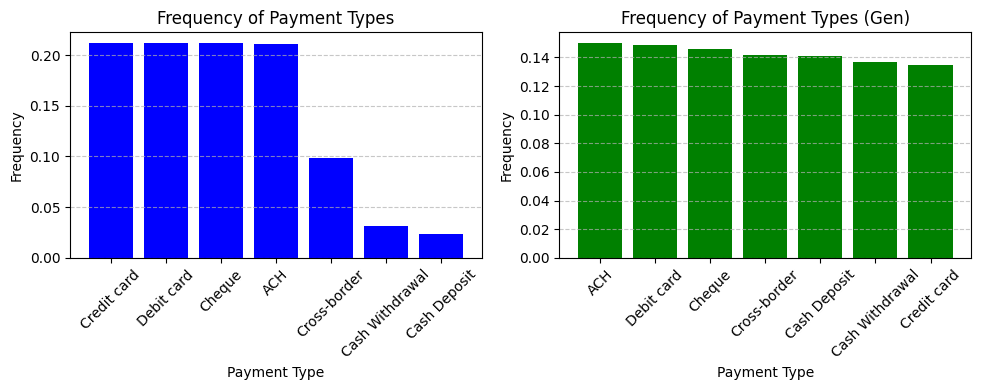

In [ ]:
payment_type_counts_gen = AML_Data_Gen['Payment_type'].value_counts().reset_index()
payment_type_counts_gen.columns = ['Payment_type', 'Count']


# Calculate the total number of transactions for each dataset
total_transactions = payment_type_counts['Count'].sum()
total_transactions_gen = payment_type_counts_gen['Count'].sum()

# Calculate the frequency of each payment type for each dataset
payment_type_counts['Frequency'] = payment_type_counts['Count'] / total_transactions
payment_type_counts_gen['Frequency'] = payment_type_counts_gen['Count'] / total_transactions_gen

plt.figure(figsize=(10, 4))

# Plotting the first frequency chart
plt.subplot(1, 2, 1)
plt.bar(payment_type_counts['Payment_type'], payment_type_counts['Frequency'], color='blue')
plt.title('Frequency of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the second frequency chart
plt.subplot(1, 2, 2)
plt.bar(payment_type_counts_gen['Payment_type'], payment_type_counts_gen['Frequency'], color='green')
plt.title('Frequency of Payment Types (Gen)')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt


**Laundering Flag**

The frequency of laundering transactions in the source dataset is much lower at only 0.1% versus 1% in the generated dataset. The small number of laundering transactions in the generated dataset is also problematic if further modelling is attempted.

In [ ]:
# Calculate the frequency of each payment type for each dataset
is_laundering_counts['Frequency'] = is_laundering_counts['Count'] / total_transactions

is_laundering_counts

,Is_laundering,Count,Frequency
0,0,9494979,0.998961
1,1,9873,0.001039


In [ ]:
is_laundering_counts_gen = AML_Data_Gen['Is_laundering'].value_counts().reset_index()
is_laundering_counts_gen.columns = ['Is_laundering', 'Count']
is_laundering_counts_gen['Frequency'] = is_laundering_counts_gen['Count'] / total_transactions_gen

is_laundering_counts_gen

,Is_laundering,Count,Frequency
0,0,990,0.99
1,1,10,0.01


### **Evaluation**

The strength of Mimesis lies in the ability to generate random data in many languages and many data types via access to many data providers.

Another strength is it's comparably faster run time and ability to produce more unique data (compared with Faker) (https://mimesis.name/en/master/about.html).

However, similar to Faker, there are limitations to Mimesis such as it's lack of ability to create data which resemebles the correct statistical properties of a dataset. For example, randomising certain features such as transaction amount will likely follow a normal distribution but this may not always be desirable.

The other issue relates to class imbalances. The number of positive fraud transactions is low in the generarted dataset. This may be overcome with techniques such as downsampling and ipweighting (see https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) or by simply increasing the number of samples in the data. Increasing samples comes at the cost of longer run time and depending on the use case, may be computationally inefficient.

